<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 112 kB 42.7 MB/s 


In [2]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 122 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.4 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638392 sha256=169a2d9ad289f6d607dbeddae52a78948f1ad1826874cb0e379ae3a9e20c545c
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the 

In [3]:
import pyupbit

In [4]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("Krw-iq", interval="minute30")
df

,open,high,low,close,volume,value
2022-09-16 16:15:00,7.42,7.44,7.42,7.43,1.229105e+06,9.123834e+06
2022-09-16 16:30:00,7.43,7.43,7.41,7.43,1.068745e+06,7.927555e+06
2022-09-16 16:45:00,7.43,7.43,7.41,7.42,3.077697e+06,2.281892e+07
2022-09-16 17:00:00,7.42,7.42,7.40,7.40,7.754643e+06,5.740712e+07
2022-09-16 17:15:00,7.40,7.42,7.35,7.36,1.410147e+07,1.040359e+08
...,...,...,...,...,...,...
2022-09-18 17:00:00,8.18,8.18,8.14,8.16,3.291734e+07,2.684946e+08
2022-09-18 17:15:00,8.17,8.23,8.15,8.23,3.910159e+07,3.200101e+08
2022-09-18 17:30:00,8.22,8.26,8.19,8.20,5.656321e+07,4.650352e+08
2022-09-18 17:45:00,8.20,8.21,8.16,8.17,2.647899e+07,2.165852e+08


In [5]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2022-09-16 16:15:00,7.43
1,2022-09-16 16:30:00,7.43
2,2022-09-16 16:45:00,7.42
3,2022-09-16 17:00:00,7.40
4,2022-09-16 17:15:00,7.36
...,...,...
195,2022-09-18 17:00:00,8.16
196,2022-09-18 17:15:00,8.23
197,2022-09-18 17:30:00,8.20
198,2022-09-18 17:45:00,8.17


In [6]:
#prophet 불러옴
from fbprophet import Prophet

In [7]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [8]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=10, freq='H')
forecast = model.predict(future)

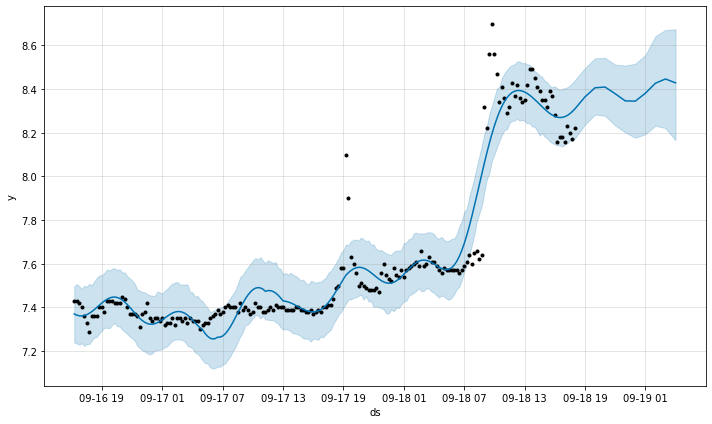

In [9]:
#그래프1
fig1 = model.plot(forecast)

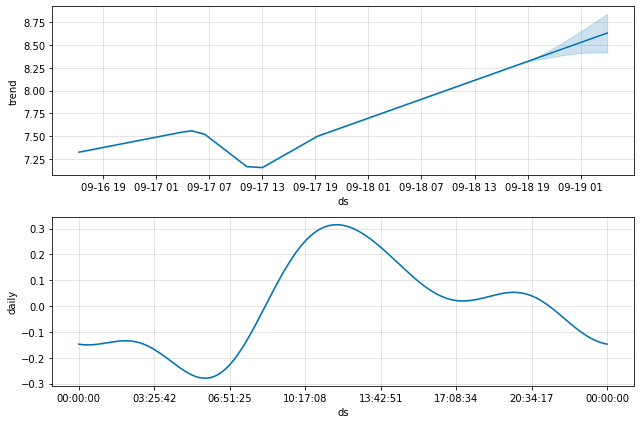

In [10]:
 #그래프2
fig2 = model.plot_components(forecast)